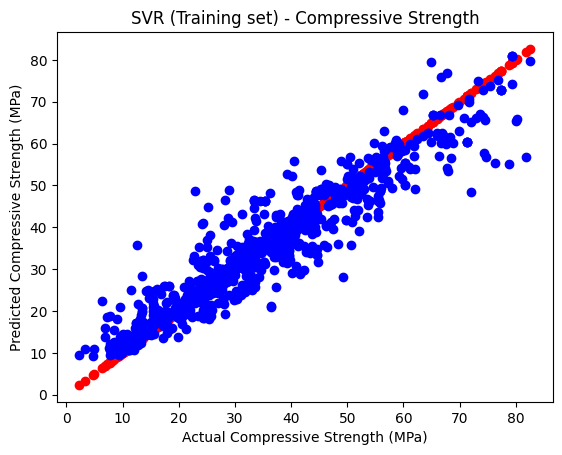

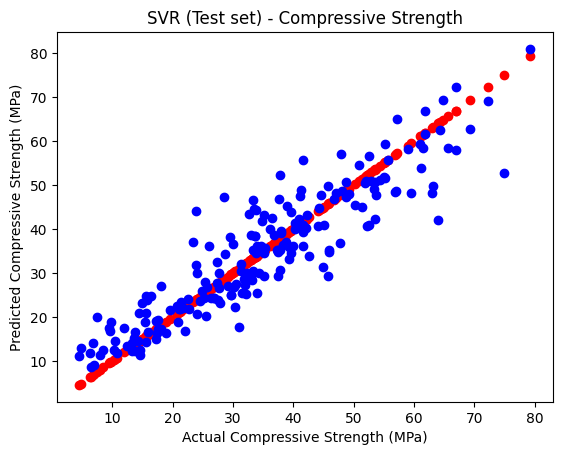

Predicted Compressive Strength for new input: 72.37199700017102 MPa


In [3]:
# Importing necessary libraries for SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (make sure you have the concrete dataset available as 'Concrete_Data.csv')
concrete_data_csv = pd.read_csv('Concrete_Data.csv')

# Selecting the features (independent variables) and target (dependent variable)
X_svr = concrete_data_csv.iloc[:, :-1].values
y_svr = concrete_data_csv.iloc[:, -1].values

# Reshape y_svr to be 2D (required for scaling)
y_svr = y_svr.reshape(-1, 1)

# Feature scaling
sc_X_svr = StandardScaler()
sc_y_svr = StandardScaler()
X_svr_scaled = sc_X_svr.fit_transform(X_svr)
y_svr_scaled = sc_y_svr.fit_transform(y_svr).ravel()

# Splitting the dataset into the Training set and Test set
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr_scaled, y_svr_scaled, test_size=0.2, random_state=0)

# Training the SVR model on the training data
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_svr, y_train_svr)

# Predicting on the training set
y_train_pred_svr = sc_y_svr.inverse_transform(svr_regressor.predict(X_train_svr).reshape(-1, 1))

# Predicting on the test set
y_test_pred_svr = sc_y_svr.inverse_transform(svr_regressor.predict(X_test_svr).reshape(-1, 1))

# Visualizing the results on the training set
plt.scatter(sc_y_svr.inverse_transform(y_train_svr.reshape(-1, 1)), sc_y_svr.inverse_transform(y_train_svr.reshape(-1, 1)), color='red')  # Actual values in red dots
plt.scatter(sc_y_svr.inverse_transform(y_train_svr.reshape(-1, 1)), y_train_pred_svr, color='blue')  # Predicted values in blue dots
plt.title('SVR (Training set) - Compressive Strength')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.show()

# Visualizing the results on the test set
plt.scatter(sc_y_svr.inverse_transform(y_test_svr.reshape(-1, 1)), sc_y_svr.inverse_transform(y_test_svr.reshape(-1, 1)), color='red')  # Actual values in red dots
plt.scatter(sc_y_svr.inverse_transform(y_test_svr.reshape(-1, 1)), y_test_pred_svr, color='blue')  # Predicted values in blue dots
plt.title('SVR (Test set) - Compressive Strength')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.show()

# Predicting a new result with SVR (using scaled values) for a custom input
new_input_svr = [[300.0, 150.0, 50.0, 180.0, 10.0, 1000.0, 700.0, 100]]  # Example input

# Scale the new input using the same scaler
new_input_svr_scaled = sc_X_svr.transform(new_input_svr)

# Predict the compressive strength using the SVR model
predicted_strength_svr = sc_y_svr.inverse_transform(svr_regressor.predict(new_input_svr_scaled).reshape(-1, 1))

# Print the predicted result
print(f"Predicted Compressive Strength for new input: {predicted_strength_svr[0][0]} MPa")
